In [1]:
from astropy.io import fits
from astropy.table import Table
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

sns.set()

In [2]:
tile_LIST = ("tile_06927.fits", "tile_06927.fits", "tile_11108.fits", "tile_16870.fits", "tile_18465.fits",\
             "tile_24227.fits", "tile_28408.fits", "tile_34170.fits","tile_39942.fits", "tile_45704.fits")


In [3]:
# all this code is for reading, assinging, and plotting for a single tile

def reading_in_tile(tile_number):
    
    fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/Intro_to_fits/" + tile_number +  "")
    hdul = fits_image_filename
    
    data1 = hdul["FIBERASSIGN"].data
    
    DESI_target_1 = data1.field("DESI_TARGET")
    BGS_target_1 = data1.field("BGS_TARGET")
    MWS_target_1 = data1.field("MWS_TARGET")
    RA_1 = data1.field("TARGET_RA")
    DEC_1 = data1.field("TARGET_DEC")

    
    return DESI_target_1, BGS_target_1, MWS_target_1, RA_1, DEC_1



def mini_tile_new(survey_name1, survey_name2, survey_name3, tile_RA, tile_DEC):
    
    new_survey_name1 = survey_name1 > 0. 
    new_survey_name2 = survey_name2 > 0.
    new_survey_name3 = survey_name3 > 0.
    cross_match_1_2 = (survey_name1 > 0.) & (survey_name2 > 0.)
    cross_match_1_3 = (survey_name1 > 0.) & (survey_name3 > 0.)
   
    new_survey_name1_RA = (tile_RA[new_survey_name1])
    new_survey_name1_DEC = (tile_DEC[new_survey_name1])
    
    new_survey_name2_RA = (tile_RA[new_survey_name2])
    new_survey_name2_DEC = (tile_DEC[new_survey_name2])
    
    new_survey_name3_RA = (tile_RA[new_survey_name3])
    new_survey_name3_DEC = (tile_DEC[new_survey_name3])
    
    cross_match_1_2_RA = (tile_RA[cross_match_1_2])
    cross_match_1_2_DEC = (tile_DEC[cross_match_1_2])
    
    
    cross_match_1_3_RA = (tile_RA[cross_match_1_3])
    cross_match_1_3_DEC = (tile_DEC[cross_match_1_3])
    
    
    return new_survey_name1_RA, new_survey_name1_DEC,\
            new_survey_name2_RA, new_survey_name2_DEC,\
            new_survey_name3_RA, new_survey_name3_DEC,\
            cross_match_1_2_RA, cross_match_1_2_DEC,\
            cross_match_1_3_RA, cross_match_1_3_DEC,

def plot_tile(tile, tileName):

    plt.figure(figsize=(10,8))
    plt.scatter(tile[0],tile[1], alpha = 0.4, color = 'blue', label ='DESI')
    plt.scatter(tile[2],tile[3], alpha = 0.4, color = 'red', label ='BGS')
    plt.scatter(tile[4],tile[5], alpha = 0.4, color = 'green', label ='MWS')
    #plt.scatter(tile[6],tile[7], alpha = 0.4, color = "black", label = "DESI/BGS Cross")
    #plt.scatter(tile[8],tile[9], alpha = 0.4, color = "magenta", label = "DESI/MWS Cross")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.legend()
    plt.title(tileName)
    
    plt.figure(figsize=(10,8))

In [4]:
# all of this code is for reading, assigning, and plotting all the tiles all at once

def reading_in_tiles(lists_of_tiles):
    
    DESI_target_2 = []
    BGS_target_2 = []
    MWS_target_2 = [] # need to have empty lists to append into 
    RA_2 = []
    DEC_2 = []
   
    
    for i in range(len(lists_of_tiles)): # for loop is iterating through the total number of files i'm wanting to use
    
        fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/Intro_to_fits/" + lists_of_tiles[i] +  "")
        hdul = fits_image_filename 
    
        data1 = hdul["FIBERASSIGN"].data
    
        DESI_target_1 = data1.field("DESI_TARGET") # this block is assinging the different columns for each tile list/iteration
        BGS_target_1 = data1.field("BGS_TARGET")
        MWS_target_1 = data1.field("MWS_TARGET")
        RA_1 = data1.field("TARGET_RA")
        DEC_1 = data1.field("TARGET_DEC")
        
        DESI_target_2.append(DESI_target_1)
        BGS_target_2.append(BGS_target_1)
        MWS_target_2.append(MWS_target_1) # appending the single arrays into one list of arrays
        RA_2.append(RA_1)
        DEC_2.append(DEC_1)

    
    return DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2 # returns list w 10 arrays in each


def mini_tiles_new(DESI, BGS, MWS, RA, DEC):
    
    DESI_tot = np.concatenate(DESI, axis = 0 )
    BGS_tot = np.concatenate(BGS, axis = 0 )
    MWS_tot = np.concatenate(MWS, axis = 0 )   # turning the list of arrays into a 1-D array
    RA_tot = np.concatenate(RA, axis = 0 )
    DEC_tot = np.concatenate(DEC, axis = 0 )
    
    
    DESI_tot1 = DESI_tot > 0. 
    BGS_tot1 = BGS_tot > 0.   # taking only the values in the array that is actually observed
    MWS_tot1 = MWS_tot > 0.
    DESI_BGS = (DESI_tot > 0.) & (BGS_tot > 0.) # cross matching DESI w BGS 
    DESI_MWS = (DESI_tot > 0.) & (MWS_tot > 0.) # cross matching DESI w MWS
   
    DESI_tot1_RA = (RA_tot[DESI_tot1])
    DESI_tot1_DEC = (DEC_tot[DESI_tot1]) # Calling the DEC of all the DESI values that are actually observed
    
    BGS_tot1_RA = (RA_tot[BGS_tot1])
    BGS_tot1_DEC = (DEC_tot[BGS_tot1])
    
    MWS_tot1_RA = (RA_tot[MWS_tot1])
    MWS_tot1_DEC = (DEC_tot[MWS_tot1])
    
    DESI_BGS_RA = (RA_tot[DESI_BGS])
    DESI_BGS_DEC = (DEC_tot[DESI_BGS])
    
    DESI_MWS_RA = (RA_tot[DESI_MWS])
    DESI_MWS_DEC = (DEC_tot[DESI_MWS])
    
    
    return DESI_tot1_RA, DESI_tot1_DEC,\
            BGS_tot1_RA, BGS_tot1_DEC,\
            MWS_tot1_RA, MWS_tot1_DEC,\
            DESI_BGS_RA, DESI_BGS_DEC,\
            DESI_MWS_RA, DESI_MWS_DEC,
                # ^ printing the new values
            
def plot_tiles(tile, tileName):

    plt.figure(figsize=(10,8))
    plt.scatter(tile[0],tile[1], alpha = 0.4, color = 'blue', label ='DESI') # plotting the values of DESI_RA/DEC 
    plt.scatter(tile[2],tile[3], alpha = 0.4, color = 'red', label ='BGS')
    plt.scatter(tile[4],tile[5], alpha = 0.4, color = 'green', label ='MWS')
    #plt.scatter(tile[6],tile[7], alpha = 0.4, color = "black", label = "DESI/BGS Cross")
    #plt.scatter(tile[8],tile[9], alpha = 0.4, color = "magenta", label = "DESI/MWS Cross")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.legend()
    plt.title(tileName)
    
    plt.figure(figsize=(10,8))


In [5]:
def total_func_single_tile(tile): # total function to read in, set variables, and plot for a single tile
    
    DESI_target_1, BGS_target_1, MWS_target_1, RA_1, DEC_1 = reading_in_tile(tile)
    
    tile = mini_tile_new(DESI_target_1, BGS_target_1, MWS_target_1, RA_1, DEC_1)
    
    plot_tile(tile, "tile_06927")
    
    
def total_func_multiple_tile(list_of_tiles): # total function to read in all the files, create one large list per 
                                             # survey, and plotting them all on one graph 
        
    DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2 = reading_in_tiles(list_of_tiles)
    
    tile = mini_tiles_new(DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2)
    
    plot_tile(tile, list_of_tiles)
    

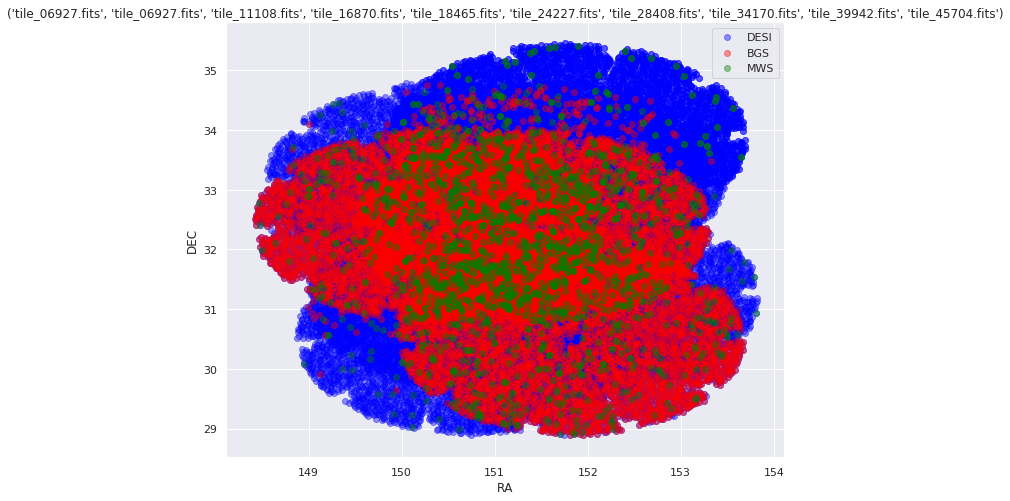

<Figure size 720x576 with 0 Axes>

In [6]:
total_func_multiple_tile(tile_LIST)

In [7]:
#DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2 = reading_in_tiles(tile_LIST)
    
#tile = mini_tiles_new(DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2)

#DESI_RA = tile[0]
#DESI_DEC = tile[1]

In [9]:
#sc = SkyCoord(DESI_RA, DESI_DEC, frame='icrs', unit='deg')
#long = sc.galactic.l.wrap_at(180 * u.deg).radian
#lat = sc.galactic.b.radian

#plt.figure(figsize=(10,8))
#plt.subplot(111, projection="aitoff")
#plt.title("Aitoff projection")
#plt.grid(True)
#plt.scatter(long, lat, s = 5., alpha=0.3)
#plt.subplots_adjust(top=0.95,bottom=0.0)
#plt.show()

In [10]:
def plot_total_aitoff(list_of_tiles):
    
    sc_DESI = SkyCoord(tile[0], tile[1], frame='icrs', unit='deg')
    sc_BGS = SkyCoord(tile[2], tile[3], frame='icrs', unit='deg')
    sc_MWS = SkyCoord(tile[4], tile[5], frame='icrs', unit='deg')
    
    long_DESI = sc_DESI.galactic.l.wrap_at(180 * u.deg).radian
    lat_DESI = sc_DESI.galactic.b.radian

    long_BGS = sc_BGS.galactic.l.wrap_at(180 * u.deg).radian
    lat_BGS = sc_BGS.galactic.b.radian
    
    long_MWS = sc_MWS.galactic.l.wrap_at(180 * u.deg).radian
    lat_MWS = sc_MWS.galactic.b.radian
    
    plt.figure(figsize=(10,8))
    plt.subplot(111, projection="aitoff")
    plt.title("Aitoff projection")
    plt.grid(True)
    plt.scatter(long_DESI, lat_DESI, s = 5., alpha = 0.3, label = 'DESI')
    plt.scatter(long_BGS, lat_BGS, s = 5., alpha=0.3, label = 'BGS')
    plt.scatter(long_MWS, lat_MWS, s = 5., alpha = 0.3, label = 'MWS')
    plt.subplots_adjust(top=0.95,bottom=0.0)
    plt.show()
    
    
    

In [11]:
def total_func_aitoff(list_of_tiles): # this function reads all files, asigns components to one list for each component
                                      # and plots them all on an aitoff projection
    
    DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2 = reading_in_tiles(list_of_tiles)
    
    tile = mini_tiles_new(DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2)
    
    plot_total_aitoff(tile)

In [12]:
total_func_aitoff(tile_LIST)

NameError: name 'tile' is not defined

In [ ]:
def single_func_aitoff(list_of_tiles): # this function reads in all the files and assigns them to one list per component
                                       # and plots 
    
    DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2 = reading_in_tiles(list_of_tiles)
    
    tile = mini_tile_new(DESI_target_2, BGS_target_2, MWS_target_2, RA_2, DEC_2)
    
    plot_total_aitoff(tile)

In [13]:
single_func_aitoff(tile_LIST)

NameError: name 'single_func_aitoff' is not defined